# Linear and Non-linear Regression


Linear regression is a **linear** approach for modelling the relationship between a scalar response $y$ and one or more explanatory variables $X$:

$$y_{i} = \theta * X_{i} + e_{i}$$

In Non-linar regression we want to fit our data (X,y) into a non-linear regression model, like:

$$y_{i} = f(X_{i},\theta) + e_{i}$$

We have seen that we can solve a linear regression problem with Gradient Descent and Pytorch.

In Scikit-Learn there are some Linear Regression Models we can easily use to do Linear Regression: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

In [1]:
import numpy as np
def make_linear_random_data(num, w, b):
    np.random.seed(42)
    error = np.random.random(size=num) / 10 #put some noise into the data
    f = lambda x: w * x + b + error
    X = np.linspace(start=0, stop=1, num=num)  
    y = f(X)
    return X, y

In [2]:
# 100 data points between 0 and 1.
w, b = 0.8, 2 #the real parameters, we want to learn
X, y = make_linear_random_data(num=100, w=w, b=b)

In [3]:
print(X.shape, y.shape)
X = X.reshape(100, -1)
y = y.reshape(100,-1)
print(X.shape, y.shape)

(100,) (100,)
(100, 1) (100, 1)


## Ordinary Least Squares Linear Regression

In [4]:
############# Ordinary least squares Linear Regression #############
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.score(X, y)/100) # OLS instead of MSE !
print(reg.coef_)
print(reg.intercept_)

0.009842386060935326
[[0.80204923]]
[2.04599346]


In [5]:
w = reg.coef_[0][0]
b = reg.intercept_[0]
h = lambda x: w*x + b

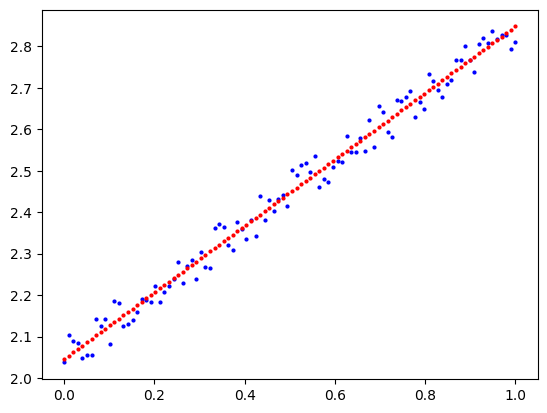

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X ,y, s=4, c="b")

plt.scatter(X ,h(X), s=4, c="r")
plt.show()

## Ridge Regression

If our data have some outliers than it could be a good strategy to impose a penalty on the size of the coefficients with l2 regularization.

Instead of minimizing OLS:

$$J(\theta) = \sum_{i=1}^{m} (y - \hat{y})^2 $$

we add some regularization term to the $J$:


$$J(\theta) = \sum_{i=1}^{m} (y - \hat{y})^2 + alpha * ||\theta||^2_2$$



In [7]:
X, y = make_linear_random_data(num=100, w=0.8, b=2)
o = np.random.random(size=100)/10 #some outlier
for i in range(0, 100, 5):
    y[i] = y[i] + o[i]
    
X = X.reshape(100, -1)
y = y.reshape(100,-1)

In [8]:
from sklearn.linear_model import LinearRegression, Ridge
reg = LinearRegression().fit(X, y)
rid = Ridge(alpha=0.0).fit(X, y) # alpha=0 -> same as LinearRegression 
rid2 = Ridge(alpha=1.0).fit(X, y)

print(reg.coef_[0][0])
print(rid.coef_[0][0])
print(rid2.coef_[0][0])

print(reg.intercept_[0])
print(rid.intercept_[0])
print(rid2.intercept_[0])


0.7996544326904134
0.7996544326904134
0.7154951957984743
2.0562559878879445
2.0562559878879445
2.0983356063339142


In [9]:
h1 = lambda x: reg.coef_[0][0]*x + reg.intercept_[0]
h2 = lambda x: rid2.coef_[0][0]*x + rid2.intercept_[0]

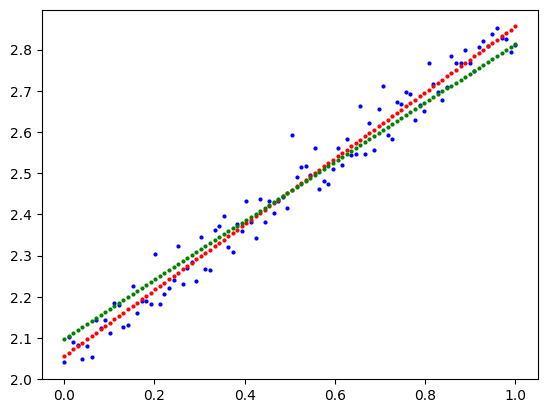

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X ,y, s=4, c="b")

plt.scatter(X ,h1(X), s=4, c="r")
plt.scatter(X ,h2(X), s=4, c="g")
plt.show()

## Shape the feature space to become non linear

Idea: if we see a non linear relationship in the data, we could add additional features by feature engineering:

$$f(x_{1}, x_{2}) = w_{1} * x_{1} + w_{2} * x_{2} + w_{3} * x_{1} * x_{2} $$ 


This would lead to an additional feature: $x_{3} = x_{1} * x_{2}$:

$$f(x_{1}, x_{2}, x_{3}) = w_{1} * x_{1} + w_{2} * x_{2} + w_{3} * x_{3} $$ 

And the problem can be solved with ordinary Linear Regression.

# Probabilistic Interpretation

A probailistic interpretation why we use Least Squares.

Assumption: 

$y^{(i)} = w^T * x^{(i)} + e^{(i)} $ and $e^{(i)}$ is some error

$ e^{(i)} \sim N(0, \sigma^2)$ Gaussian-normaly distributed with Mean 0 und Covariance $\sigma^2$. IID.

$$ p(e^{(i)}) = \frac{1}{  \sqrt{2 \pi} * \sigma} * \exp{(- \frac{ (e^{(i)})^2}{2 \sigma^2})}$$

This leads to:

$$ p(y^{(i)}|x^{(i)};w)= \frac{1}{  \sqrt{2 \pi} * \sigma} * \exp{(- \frac{ (y^{(i)} - w^T * x^{(i)})^2}{2 \sigma^2})}$$

(y and x are random variables and w parameters).

Because of $e$ is IID the Likelihood $L(w)$ is given by:

$$L(w) = p(y|x;w) = \prod_{i=1}^{m} p(y^{(i)}|x^{(i)};w) $$

Likelihood L is a function of the parameters w, instead probability P is a function of the data x and y.

Maximizing $L$ is equivalent with minimizing $- \log_{} L$:

$$arg\max_{w} L(w) = arg\min_{w} -\log_{} L(w) $$


Log Likelyhood

$$ \log _{} L(w) =  \sum_{i=1}^{m} \log _{} p(y^{(i)}|x^{(i)};w) $$
$$                 =  \sum_{i=1}^{m} \log _{} [ \frac{1}{  \sqrt{2 \pi} * \sigma} * \exp{(- \frac{ (y^{(i)} - w^T * x^{(i)})^2}{2 \sigma^2})}]$$
$$ = - \frac{m}{2} \log _{}{(2 \pi \sigma^2)} - \sum_{i=1}^{m} \log _{} \exp{(\frac{ (y^{(i)} - w^T * x^{(i)})^2}{2 \sigma^2})}$$
$$ = - \frac{m}{2} \log _{}{(2 \pi \sigma^2)} -\frac{1}{2 \sigma^2} * \sum_{i=1}^{m}  (y^{(i)} - w^T * x^{(i)})^2 $$

Maximum Likelihood Estimation (MLE): 

Choose a $w$ that maximizes $L(w)$. Because of $log$ is strictly monoton growing function:

$$arg\min_{w} -\log_{} L(w) = arg\max_{w} L(w) $$


This is equivalent with: Choose a $w$ that minimize $\sum_{i=1}^{m} (y^{(i)} - w^T * x^{(i)})^2$. 